# Task 8: Clustering with K-Means

 1.Load and visualize dataset (optional PCA for 2D view).

 2.Fit K-Means and assign cluster labels.

 3.Use the Elbow Method to find optimal K.

 4.Visualize clusters with color-coding.

 5.Evaluate clustering using Silhouette Score.

# importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Data Loading

In [2]:
df = pd.read_csv('Mall_Customers.csv')
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (200, 5)


In [3]:
display(df.head())
display(df.info())
display(df.describe())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


None

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Data Exploration

In [4]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Text(0, 0.5, 'Frequency')

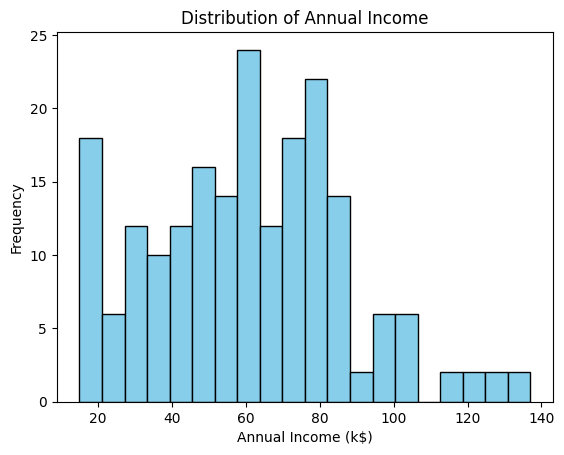

In [5]:
plt.hist(df['Annual Income (k$)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')

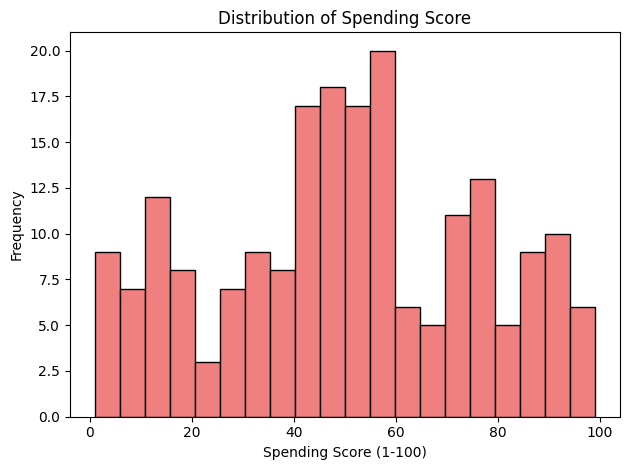

In [6]:
plt.hist(df['Spending Score (1-100)'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [7]:
numerical_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df[numerical_features].corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


# Data Preparation

In [8]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = ['Annual Income (k$)', 'Spending Score (1-100)'])


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])

display(X_scaled_df.head())
display(X_pca_df.head())

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


,PCA1,PCA2
0,-1.537109,-0.922207
1,-0.384168,-2.075149
2,-2.416002,0.010665
3,-0.466982,-1.938355
4,-1.455678,-0.895678


# Data Visualization

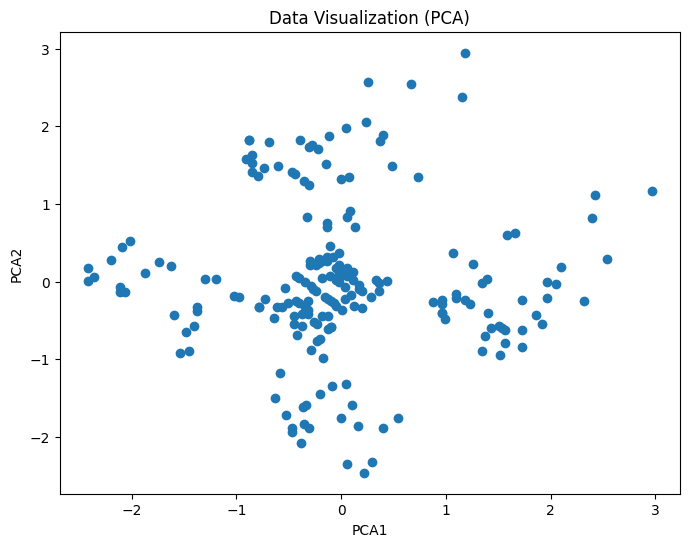

In [9]:
if 'X_pca_df' in locals():
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca_df['PCA1'], X_pca_df['PCA2'])
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.title('Data Visualization (PCA)')
else:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_scaled_df['Annual Income (k$)'], X_scaled_df['Spending Score (1-100)'])
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.title('Data Visualization')

plt.show()

# Data Clustering

In [10]:
kmeans_models = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X_pca_df)
    kmeans_models[k] = kmeans

# Model Evaluation

In [11]:
from sklearn.metrics import silhouette_score

silhouette_scores = {}
for k, kmeans_model in kmeans_models.items():
    if k > 1:
        labels = kmeans_model.labels_
        silhouette_avg = silhouette_score(X_pca_df, labels)
        silhouette_scores[k] = silhouette_avg
        print(f"For n_clusters = {k}, the average silhouette_score is : {silhouette_avg}")

For n_clusters = 2, the average silhouette_score is : 0.2864063722520628
For n_clusters = 3, the average silhouette_score is : 0.46658474418951484
For n_clusters = 4, the average silhouette_score is : 0.49390692375070455
For n_clusters = 5, the average silhouette_score is : 0.5546571631100179
For n_clusters = 6, the average silhouette_score is : 0.5377141165723205
For n_clusters = 7, the average silhouette_score is : 0.526345449070106
For n_clusters = 8, the average silhouette_score is : 0.4567208019687017
For n_clusters = 9, the average silhouette_score is : 0.45805265700691267
For n_clusters = 10, the average silhouette_score is : 0.4484330329905973


# Model Optimization

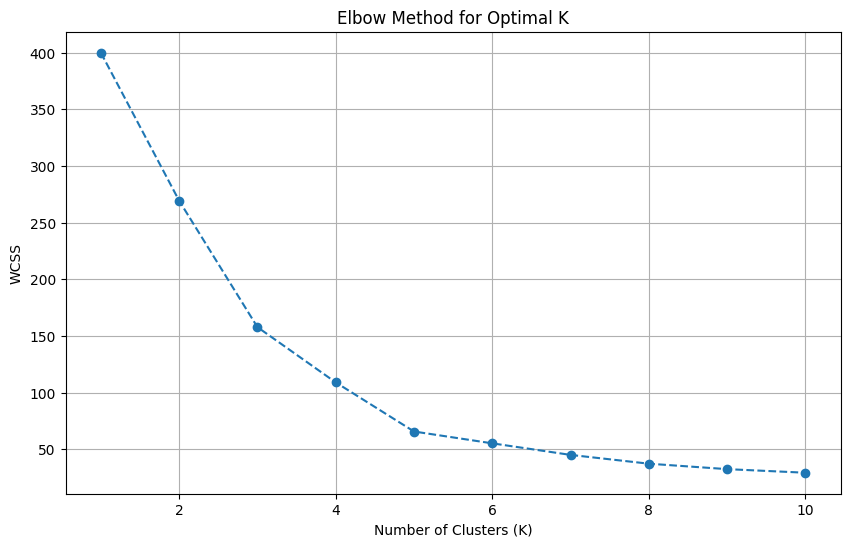

In [12]:
wcss = []
for k, model in kmeans_models.items():
    wcss.append(model.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

# Data Clustering

In [13]:
optimal_k = 5

kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)
kmeans_optimal.fit(X_pca_df)
X_pca_df['cluster_labels'] = kmeans_optimal.labels_

display(X_pca_df.head())

,PCA1,PCA2,cluster_labels
0,-1.537109,-0.922207,3
1,-0.384168,-2.075149,4
2,-2.416002,0.010665,3
3,-0.466982,-1.938355,4
4,-1.455678,-0.895678,3


# Data Visualization

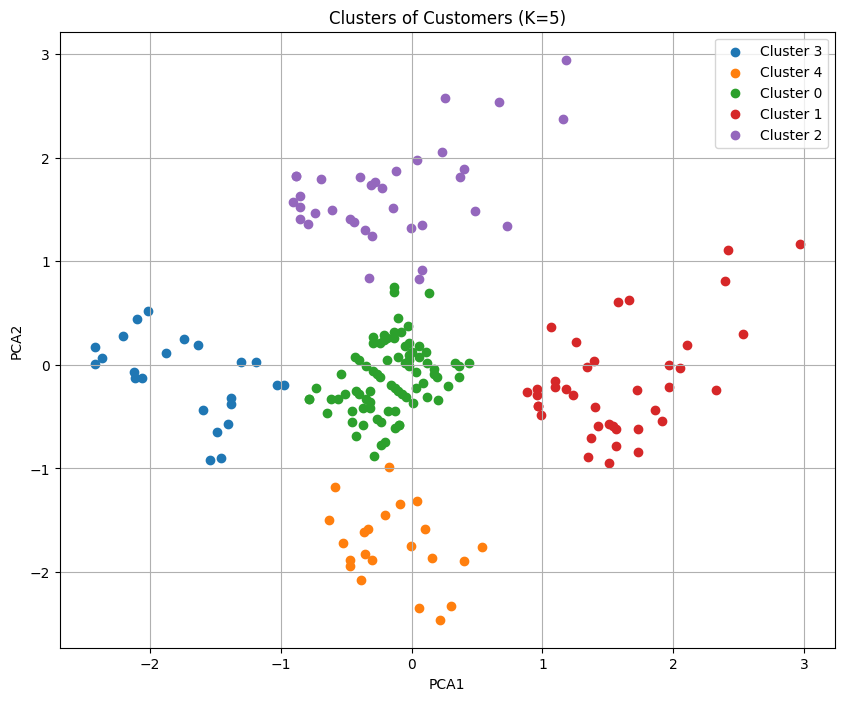

In [14]:
plt.figure(figsize=(10, 8))
for cluster_label in X_pca_df['cluster_labels'].unique():
    cluster_data = X_pca_df[X_pca_df['cluster_labels'] == cluster_label]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster_label}')


plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters of Customers (K=5)')
plt.legend()
plt.grid(True)
plt.show()